<a href="https://colab.research.google.com/github/Evans-Sense/pet/blob/main/lessons/GD_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import numpy.linalg as la
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

%matplotlib inline
np.random.seed(123)

import warnings
warnings.filterwarnings("ignore")

In [ ]:
plt.rcParams["figure.figsize"] = [12, 8]

# Линейная регрессия

### Описание данных
$ y = \omega_0 + \omega_1 x + \epsilon $

In [ ]:
x = 2 * np.random.rand(100, 1)
y = 4 + 3 * x + np.random.randn(100, 1)
df = pd.DataFrame(np.hstack([x, y]), columns=['x', 'y'])
df.head()

,x,y
0,1.392938,10.265928
1,0.572279,5.881277
2,0.453703,6.511314
3,1.102630,6.040537
4,1.438938,8.497849


In [ ]:
df.shape

(100, 2)

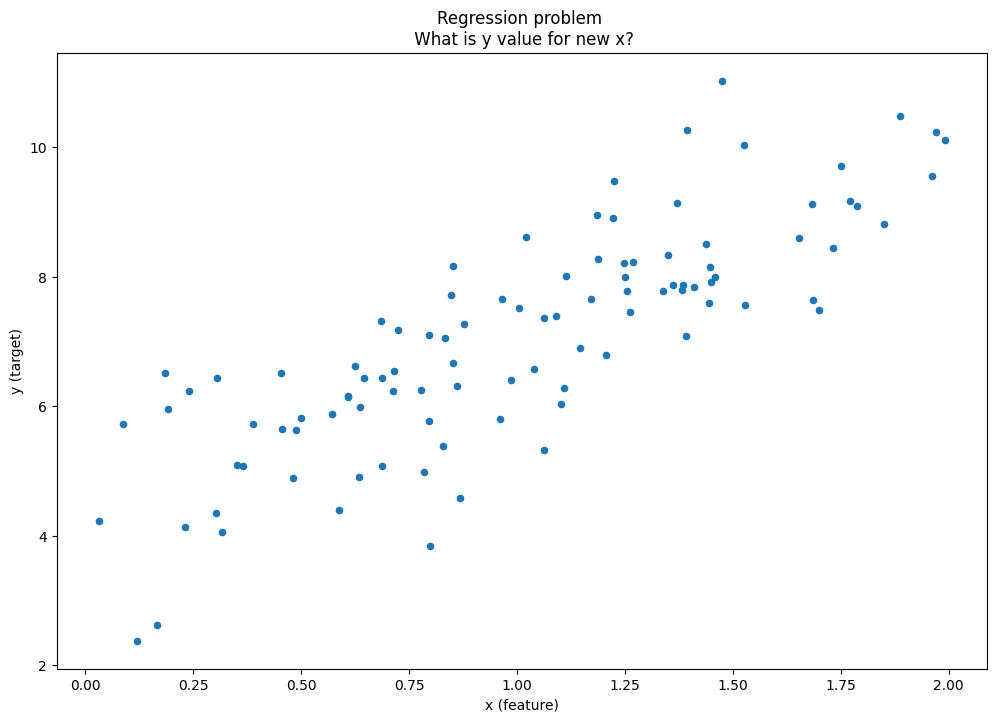

In [ ]:
#df.plot.scatter('x', 'y', figsize=(12,8))
df.plot.scatter('x', 'y')
plt.title("Regression problem \n What is y value for new x?")
plt.xlabel("x (feature)")
plt.ylabel("y (target)");

## Парная регрессия

### Описание данных
$$ y = \omega_0 + \omega_1 x + \epsilon $$

### Предсказание
$$ \hat{y} = \hat{\omega_0} + \hat{\omega_1} x $$



Построим случайную прямую. Насколько хорошо она описывает данные?

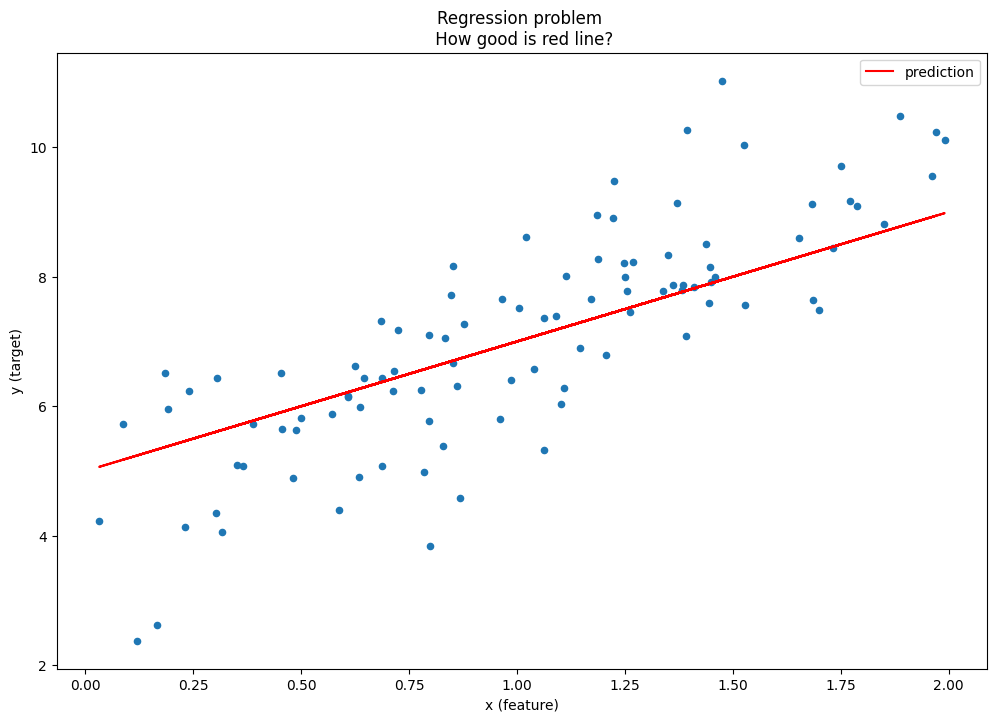

In [ ]:
def predict(x):
    return 2 * x + 5

df.plot.scatter('x', 'y')
plt.title("Regression problem \n How good is red line?")
plt.xlabel("x (feature)")
plt.ylabel("y (target)")
plt.plot(x, predict(x), color='red', label='prediction')
plt.legend();

## RSS
Residual Sum of Squares

$$ RSS = \mathcal{L}(y, \hat{y}) = \sum_{i=1}^{n}(y_i - \hat{y}_i)^2 \rightarrow min$$

$$ RSS = \mathcal{L}(y, \hat{y}) = \sum_{i=1}^{n}(y_i - (\hat{\omega_0} + \hat{\omega_1} x))^2 \rightarrow min$$

$$ RSS = \mathcal{L}(y, \hat{y}) = \sum_{i=1}^{n}( (\hat{\omega_0} + \hat{\omega_1} x) - y_i)^2 \rightarrow min$$  Квадратичная функция от $\omega_0$ и $\omega_1$ - парабола ветвями вверх

Метод наименьших квадратов.
Эта метрика была выбрана как функция, которую легко было минимизировать.  
После было доказано (теорема Гаусса Маркова), что она дает оптимальное решение (при определенных условиях, накладываемых на данные).  

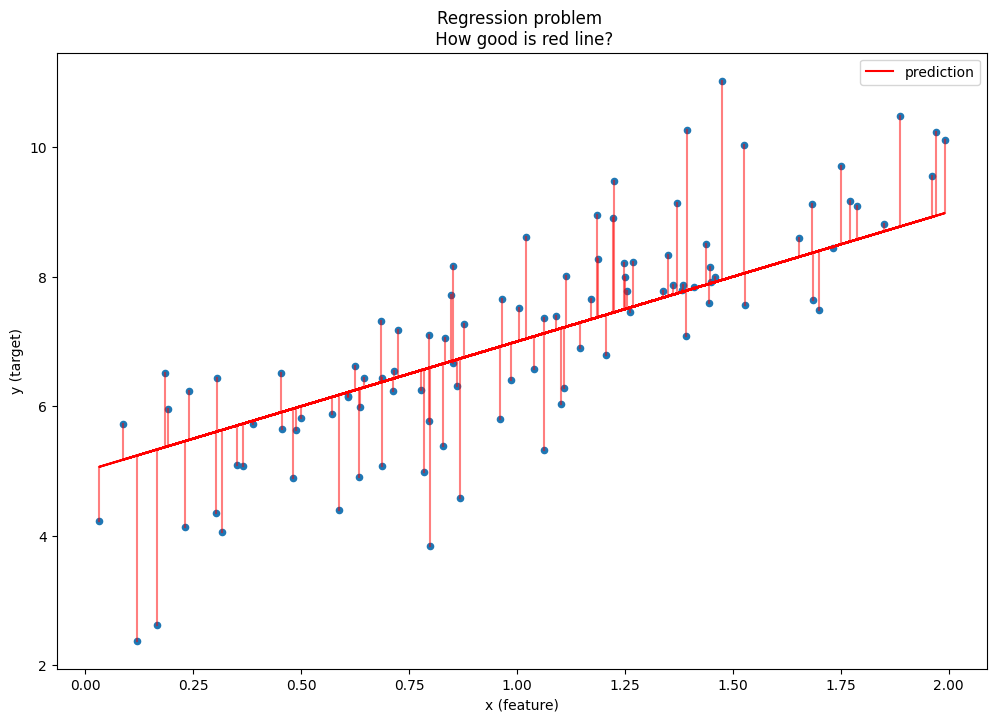

In [ ]:
y_pred = predict(x)

df.plot.scatter('x', 'y')
plt.title("Regression problem \n How good is red line?")
plt.xlabel("x (feature)")
plt.ylabel("y (target)")
plt.plot(x, y_pred, color='red', label='prediction')
plt.legend()

for x_i, y_i, y_i_pred in zip(x, y, y_pred):
    plt.plot([x_i, x_i], [y_i_pred, y_i], color='red', alpha=0.5)


In [ ]:
rss = ((y - y_pred) ** 2).sum()
print('RSS: ', round(rss,4))

print('MAE: ', round(mean_absolute_error(y, y_pred),4 ))

RSS:  113.9005
MAE:  0.8121


## SKLEARN

Intercept: 4.1699 
Slope: 2.8655


MAE: 0.7588


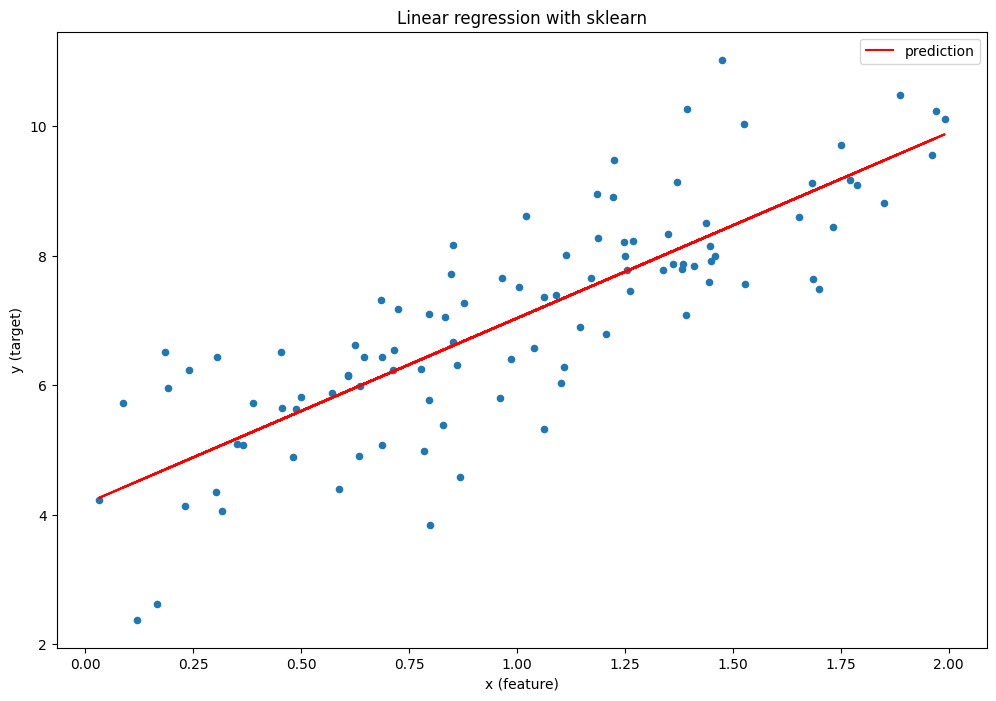

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x, y)
print("Intercept: {:.4f} \nSlope: {:.4f}\n".format(lin_reg.intercept_[0], lin_reg.coef_[0][0]))
y_pred = lin_reg.predict(x)
print("\nMAE: {:.4f}".format(mean_absolute_error(y_pred, y)))

df.plot.scatter('x', 'y')
plt.title("Linear regression with sklearn")
plt.xlabel("x (feature)")
plt.ylabel("y (target)")
plt.plot(x, y_pred, color='red', label='prediction')
plt.legend();


## Множественная регрессия

Пусть теперь признаков не один, а много.
$$ \hat{y} = \hat{\omega_0} * 1 + \hat{\omega_1} x_1 + \hat{\omega_2} x_2 + ... + \hat{\omega_p} x_p  = x^T\hat{\omega}$$

Принципиально ничего не меняется. Решаем задачу градиентным спуском:

$$\hat{w}^{(t)} = \hat{w}^{(t-1)} - \eta \nabla L(\hat{w}^{(t-1)}),$$
$\eta$ — learning rate.

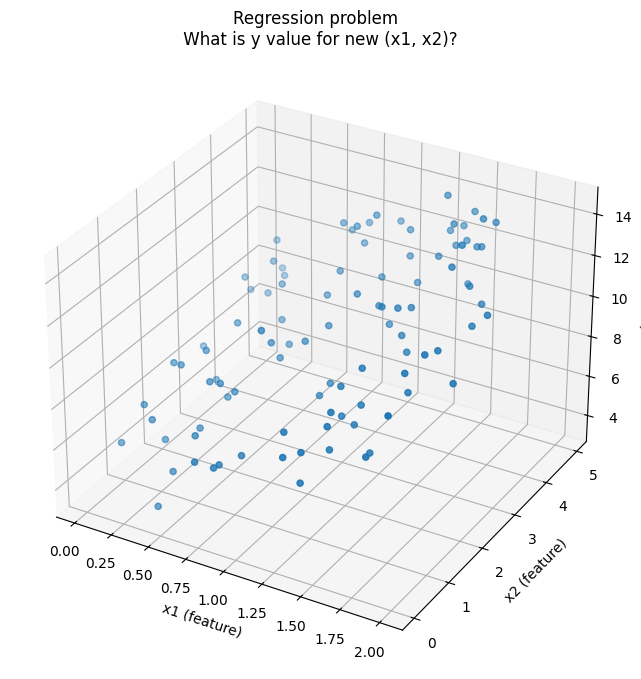

In [ ]:
# Размер графика
plt.rcParams["figure.figsize"] = [12, 8]

# Данные
x1 = 2 * np.random.rand(100, 1)
x2 = 5 * np.random.rand(100, 1)
y = 4 + 3 * x1 + 1 * x2 + np.random.randn(100, 1)

# Создаём 3D оси
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

# Точки
ax.scatter(x1, x2, y, marker="o")

# Подписи
ax.set_title("Regression problem \n What is y value for new (x1, x2)?")
ax.set_xlabel("x1 (feature)")
ax.set_ylabel("x2 (feature)")
ax.set_zlabel("y (target)")

plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
X = np.hstack([x1, x2])
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print("Intercept: {:.4f} \nSlopes: {}\n".format(lin_reg.intercept_[0], lin_reg.coef_[0]))
y_pred = lin_reg.predict(X)
print("\nMAE: {:.4f}".format(mean_absolute_error(y_pred, y)))

Intercept: 3.7257 
Slopes: [3.10931493 1.0125571 ]


MAE: 0.7819


In [ ]:
def plane(x1, x2):
    return 3.7257  + 3.10931493 * x1  + 1.0125571 * x2

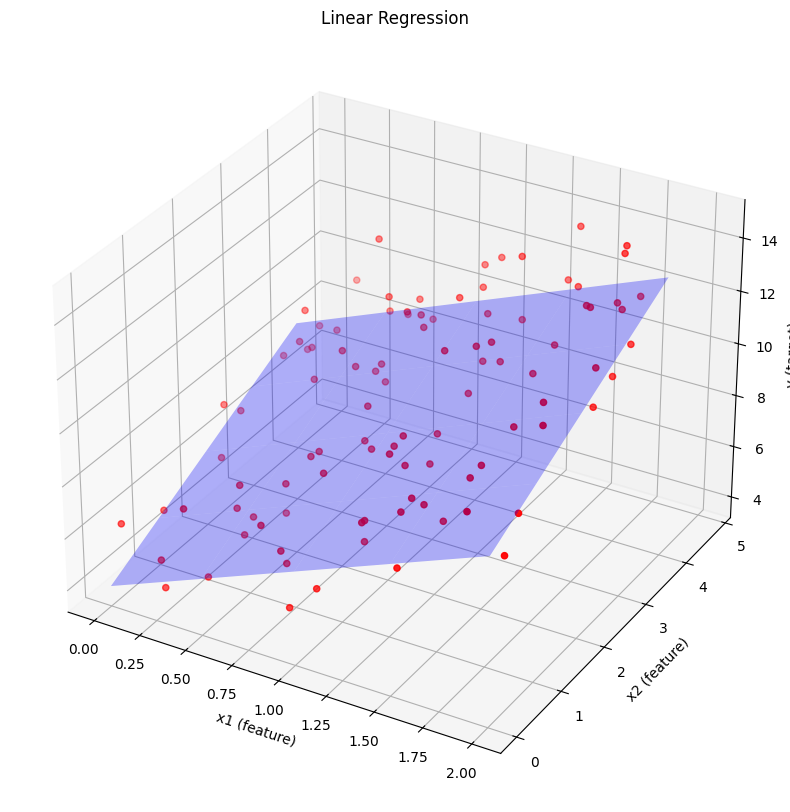

In [ ]:

# Данные
x1 = 2 * np.random.rand(100, 1)
x2 = 5 * np.random.rand(100, 1)
y = 4 + 3 * x1 + 1 * x2 + np.random.randn(100, 1)

# Обучаем модель
X = np.hstack([x1, x2])
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Создаём фигуру и 3D ось
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection="3d")

# Сетка для плоскости
x1_surfs = np.arange(0, 2.5, 0.5)
x2_surfs = np.arange(0, 5.0, 1)
x1_surf, x2_surf = np.meshgrid(x1_surfs, x2_surfs)

# Предсказания на сетке
X_pred = np.c_[x1_surf.ravel(), x2_surf.ravel()]
z_predicted = lin_reg.predict(X_pred).reshape(x1_surf.shape)

# Плоскость и точки
ax.plot_surface(x1_surf, x2_surf, z_predicted, alpha=0.3, color="blue")
ax.scatter(x1, x2, y, marker="o", color="red")

# Подписи
ax.set_title("Linear Regression")
ax.set_xlabel("x1 (feature)")
ax.set_ylabel("x2 (feature)")
ax.set_zlabel("y (target)")

plt.show()

## Реальные данные

Давайте посмотрим, как работает линейная регрессия на реальных данных.

Возьмем **House Price Dataset**.

In [ ]:
# loading the data from pc
data = pd.read_csv('https://huggingface.co/datasets/ankislyakov/train_home_price/resolve/main/train_home_price.csv', index_col=0)
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### Описание данных:  

Здесь описание некоторых полей датасета:  

- SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.  

  
- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access
- Alley: Type of alley access
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to main road or railroad
- Condition2: Proximity to main road or railroad (if a second is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Overall material and finish quality
- OverallCond: Overall condition rating
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Exterior material quality
- ExterCond: Present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Height of the basement
- BsmtCond: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1: Quality of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Quality of second finished area (if present)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Number of bedrooms above basement level
- Kitchen: Number of kitchens
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: $Value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale  




Для простоты оставим только несколько числовых признаков.

In [ ]:
cols =['MSSubClass', 'LotArea', 'OverallQual',\
      'OverallCond', 'YearBuilt', 'YearRemodAdd',\
      'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',\
     'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',\
     'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',\
     'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',\
     'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',\
     'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']

data = data[cols]
data.shape

(1460, 31)

In [ ]:
data.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,8450,7,5,2003,2003,150,856,856,854,...,0,61,0,0,0,0,0,2,2008,208500
2,20,9600,6,8,1976,1976,284,1262,1262,0,...,298,0,0,0,0,0,0,5,2007,181500
3,60,11250,7,5,2001,2002,434,920,920,866,...,0,42,0,0,0,0,0,9,2008,223500
4,70,9550,7,5,1915,1970,540,756,961,756,...,0,35,272,0,0,0,0,2,2006,140000
5,60,14260,8,5,2000,2000,490,1145,1145,1053,...,192,84,0,0,0,0,0,12,2008,250000


Проверим, что в данных нет Nan.

In [ ]:
data.isna().sum().sum()

np.int64(0)

### Нормируем данные

Чтобы не подглядывать в тест, обучать `scaler` необходимо на `train`, а не на всех данных.

**Warning:** ни в коем случае не применяйте метод `fit_transform` к test, только `transform`. Иначе у вас могут получится разные масштабы для `train` (условно км) и `test` (условно м), и ваша обученная модель на тесте "сойдет с ума"!

In [ ]:
from sklearn.preprocessing import StandardScaler
# StandardScaler?

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.drop('SalePrice', axis=1), data.SalePrice, \
                                                    test_size=0.33, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train.mean(axis = 0)

array([ 1.81631579e-17, -7.62852630e-17, -3.03324736e-16, -9.80810525e-17,
       -5.59425262e-16, -1.26415579e-15,  7.26526315e-18, -1.31682895e-16,
        2.60187236e-16, -6.53873683e-17, -4.35915789e-17, -5.08568420e-17,
        4.17752631e-17,  7.99178946e-17, -5.44894736e-17,  1.72550000e-16,
        2.14325263e-16,  2.45202631e-17, -3.63263157e-18,  1.58019473e-16,
       -1.19876842e-16,  2.72447368e-17, -3.81426315e-17, -3.63263157e-18,
       -2.90610526e-17, -9.08157893e-18, -3.63263157e-18,  2.90610526e-17,
        9.08157893e-17, -6.23936258e-14])

### Модель

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

print("Test MSE = %.4f" % mean_squared_error(y_test, y_pred))
print("Train MSE = %.4f" % mean_squared_error(y_train, y_train_pred))

Test MSE = 1614515572.4444
Train MSE = 1118168696.9802


In [ ]:
mean_absolute_error(y_test, y_pred)

24246.916797618604

In [ ]:
mean_absolute_error(y_test, y_pred)/np.mean(y_test)

np.float64(0.13420850329518594)

Большая ошибка связана с тем, что зависимость в данном случае нелинейная.

Здесь понадобятся более мощные модели.

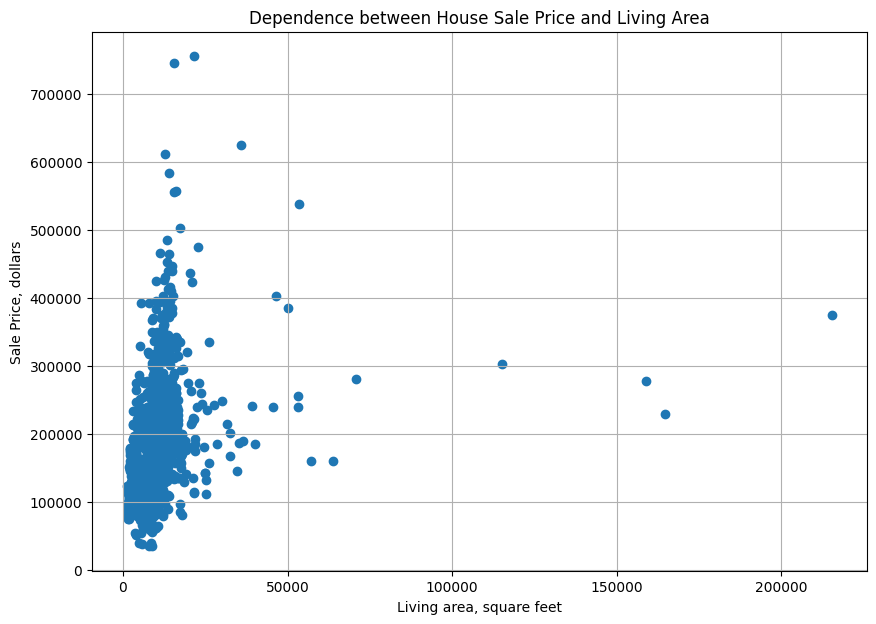

In [ ]:
#set figsize of the plot
plt.figure(figsize = (10,7))
#scatter plot of the data
plt.scatter(data.LotArea, data.SalePrice)
#text for x axis
plt.xlabel('Living area, square feet')
#text for y axis
plt.ylabel('Sale Price, dollars')
#text for the plot title
plt.grid()
plt.title('Dependence between House Sale Price and Living Area')
#show the plot
plt.show()

Обратно в презентацию.

## Регуляризация


* Добавить дополнительное ограничение на норму вектора весов $R(\omega)$:
$$
\sum_{n=1}^{N}\left(x_{n}^{T}\omega-y_{n}\right)^{2}+\lambda R(\omega)\to\min_{\beta}
$$
* $\lambda>0$ - гиперпараметр.
* $R(\omega)$ штраф за сложность модели.


$$
\begin{array}{ll}
R(\omega)=||\omega||_{1} &  \text{(L1) Lasso regression}\\
R(\omega)=||\omega||_{2}^{2} & \text{(L2) Ridge regression}
\end{array}
$$

<img src="https://drive.google.com/uc?id=1WIONg5WAtiV4jKjmOA2Zn_B4uPAVPp6y" width=70%>

# Ridge

$$
\begin{array}{ll}
\\
R(\omega)=||\omega||_{2}^{2} & \text{(L2) Ridge regression}
\end{array}
$$

In [ ]:
from sklearn.linear_model import Ridge

model = Ridge(alpha = 100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

print("Test MSE = %.4f" % mean_squared_error(y_test, y_pred))
print("Train MSE = %.4f" % mean_squared_error(y_train, y_train_pred))

Test MSE = 1615465462.7835
Train MSE = 1132869946.2694


In [ ]:
mean_absolute_error(y_test, y_pred)

23724.818589331157

# Lasso

$$
\begin{array}{ll}
R(\omega)=||\omega||_{1} &  \text{(L1) Lasso regression}\\
\\
\end{array}
$$

In [ ]:
from sklearn.linear_model import Lasso

model = Lasso(alpha = 100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

print("Test MSE = %.4f" % mean_squared_error(y_test, y_pred))
print("Train MSE = %.4f" % mean_squared_error(y_train, y_train_pred))

Test MSE = 1609485220.4313
Train MSE = 1118496128.8041


In [ ]:
mean_absolute_error(y_test, y_pred)

24165.23028008773

## ElasticNet

ElasticNet - совмещает в себе 2 вида регуляризации: Ridge и Lasso.

Она минимизирует функцию:
```
1 / (2 * n_samples) * ||y - Xw||^2_2 + alpha * l1_ratio * ||w||_1 + 0.5 * alpha * (1 - l1_ratio) * ||w||^2_2
```
`alpha` - сила регуляризации;

 `l1_ratio` - доля $L_1$ регуляризации.

In [ ]:
from sklearn.linear_model import ElasticNet
model = ElasticNet(alpha = 0.5,  l1_ratio= 0.5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

print("Test MSE = %.4f" % mean_squared_error(y_test, y_pred))
print("Train MSE = %.4f" % mean_squared_error(y_train, y_train_pred))

Test MSE = 1643860759.0760
Train MSE = 1169114487.2272


In [ ]:
mean_absolute_error(y_test, y_pred)

23526.17113726367

In [ ]:
model

ElasticNet(alpha=0.5)

## Пример 2.

In [ ]:
def gradient_descent(X, y, learning_rate=0.01, epochs=1000):
    m, n = X.shape
    w = np.zeros(n)  # веса
    b = 0            # смещение
    losses = []      # история ошибок

    for epoch in range(epochs):
        y_pred = X.dot(w) + b
        error = y_pred - y

        # Градиенты
        dw = (2/m) * X.T.dot(error)
        db = (2/m) * np.sum(error)

        # Обновление параметров
        w -= learning_rate * dw
        b -= learning_rate * db

        # Расчет MSE
        loss = np.mean(error ** 2)
        losses.append(loss)

        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Loss: {loss:.4f}")

    return w, b, losses

# Обучение модели
w, b, losses = gradient_descent(X_train, y_train, learning_rate=0.01, epochs=1000)

Epoch 0, Loss: 38574844343.1043
Epoch 100, Loss: 1748199862.3795
Epoch 200, Loss: 1145211212.3378
Epoch 300, Loss: 1124625597.4320
Epoch 400, Loss: 1120768374.8854
Epoch 500, Loss: 1119368021.2238
Epoch 600, Loss: 1118784343.2970
Epoch 700, Loss: 1118513367.2482
Epoch 800, Loss: 1118374050.7802
Epoch 900, Loss: 1118296148.8620


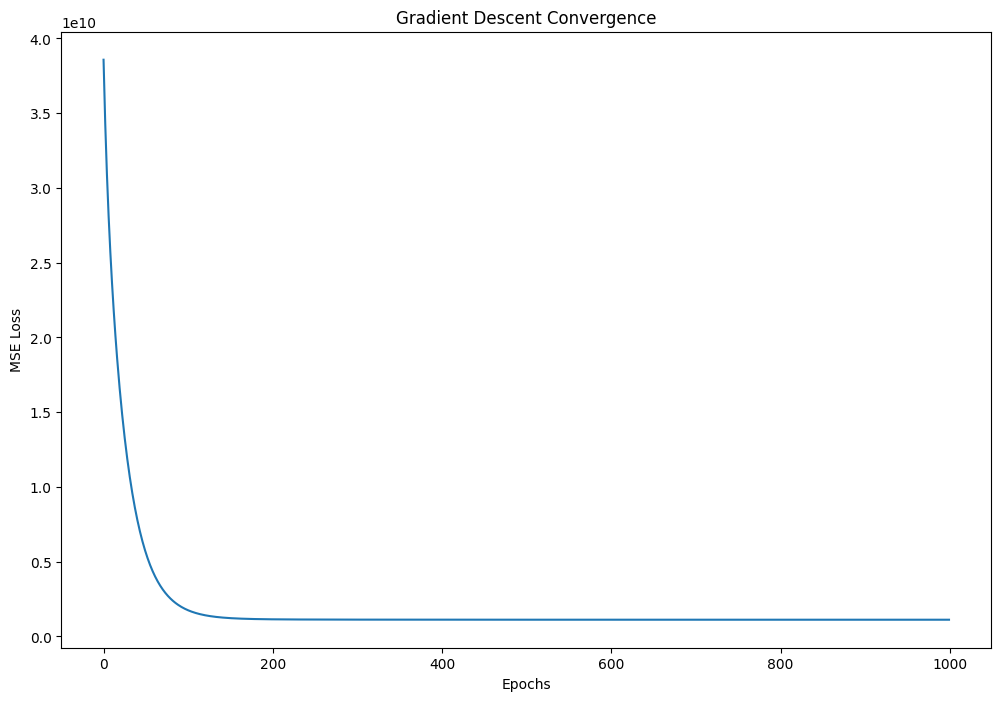

In [ ]:


plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Gradient Descent Convergence")
plt.show()

Если график плавно снижается → градиентный спуск работает.

Если loss скачет → слишком большой learning_rate.

Если loss не уменьшается → мало эпох или ошибка в коде.

Сравним с LR Skleran

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Наша модель
y_pred_custom = X_test.dot(w) + b
mse_custom = mean_squared_error(y_test, y_pred_custom)

# Sklearn
model_sklearn = LinearRegression()
model_sklearn.fit(X_train, y_train)
y_pred_sklearn = model_sklearn.predict(X_test)
mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)

print(f"MSE (Custom GD): {mse_custom:.4f}")
print(f"MSE (Sklearn): {mse_sklearn:.4f}")

MSE (Custom GD): 1615878365.9654
MSE (Sklearn): 1614515572.4444


Эксперимент 2. Поиграем с Learning rate

In [ ]:
# Функция градиентного спуска с сохранением истории ошибок
def gradient_descent(X, y, learning_rate=0.01, epochs=1000):
    m, n = X.shape
    w = np.zeros(n)
    b = 0
    losses = []

    for epoch in range(epochs):
        y_pred = X.dot(w) + b
        error = y_pred - y

        dw = (2/m) * X.T.dot(error)
        db = (2/m) * np.sum(error)

        w -= learning_rate * dw
        b -= learning_rate * db

        loss = np.mean(error ** 2)
        losses.append(loss)

    return losses

# Запуск для разных learning_rate
losses_lr01 = gradient_descent(X_train, y_train, learning_rate=0.1, epochs=100)
losses_lr001 = gradient_descent(X_train, y_train, learning_rate=0.01, epochs=100)
losses_lr0001 = gradient_descent(X_train, y_train, learning_rate=0.001, epochs=100)

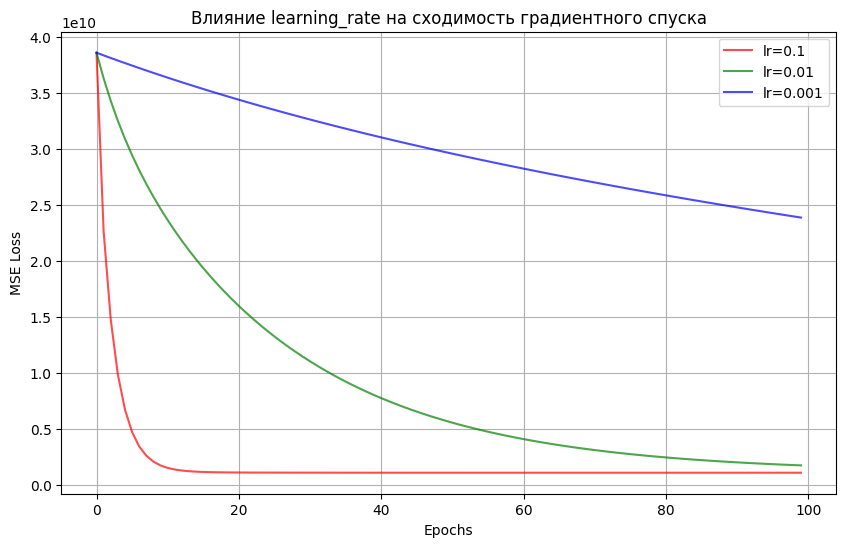

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(losses_lr01, label='lr=0.1', color='red', alpha=0.7)
plt.plot(losses_lr001, label='lr=0.01', color='green', alpha=0.7)
plt.plot(losses_lr0001, label='lr=0.001', color='blue', alpha=0.7)
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Влияние learning_rate на сходимость градиентного спуска")
plt.legend()
plt.grid(True)
plt.show()

lr = 0.1 (красный график):

Проблема: Слишком высокий learning_rate приводит к "перепрыгиванию" оптимального решения.

Признаки:

Loss скачет или расходится (уходит в бесконечность).

Возможны NaN из-за численной нестабильности.

lr = 0.01 (зеленый график):

Идеальный вариант: Плавное и устойчивое снижение ошибки.

Признаки:

Loss монотонно уменьшается.

Быстро достигает минимума (за 50-100 эпох).

lr = 0.001 (синий график):

Проблема: Слишком низкий learning_rate замедляет обучение.

Признаки:

Loss уменьшается очень медленно.

Даже после 100 эпох не достигнут минимум.